In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
def load_data(data_dir):
    """
    Loads all CSV files from the specified directory, cleans column names,
    and combines them into a single DataFrame.

    Args:
    - data_dir (str): Path to the directory containing CSV files.

    Returns:
    - pd.DataFrame: Combined DataFrame with data from all CSV files.
    """
    logging.info(f"Loading data from directory: {data_dir}")

    # List all CSV files in the directory
    csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in directory: {data_dir}")

    dataframes = []

    for file in csv_files:
        try:
            # Load each CSV file into a DataFrame
            df = pd.read_csv(file)

            # Clean column names by stripping any leading or trailing whitespace
            df.columns = df.columns.str.strip()

            # Append the DataFrame to the list
            dataframes.append(df)

            # Log the shape of the loaded DataFrame
            logging.info(f"Loaded {file} with shape {df.shape}")

        except Exception as e:
            # Log an error if loading fails
            logging.error(f"Failed to load {file}. Error: {str(e)}")
            continue

    # Combine all DataFrames into one
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        logging.info(f"Data loaded. Combined shape: {combined_df.shape}")
    else:
        raise ValueError("No valid dataframes to combine.")

    return combined_df

In [4]:
# Set up logging (optional, for better logging output)
logging.basicConfig(level=logging.INFO)

In [5]:
# Specify the path to your directory containing CSV files
data_dir = '/content/drive/MyDrive/Colab Notebooks/Files/'

# Load the data from the specified directory
try:
    df = load_data(data_dir)
    print(f"Data loaded successfully. Shape of the combined DataFrame: {df.shape}")
except Exception as e:
    logging.error(f"Error while loading data: {str(e)}")


Data loaded successfully. Shape of the combined DataFrame: (225745, 79)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non

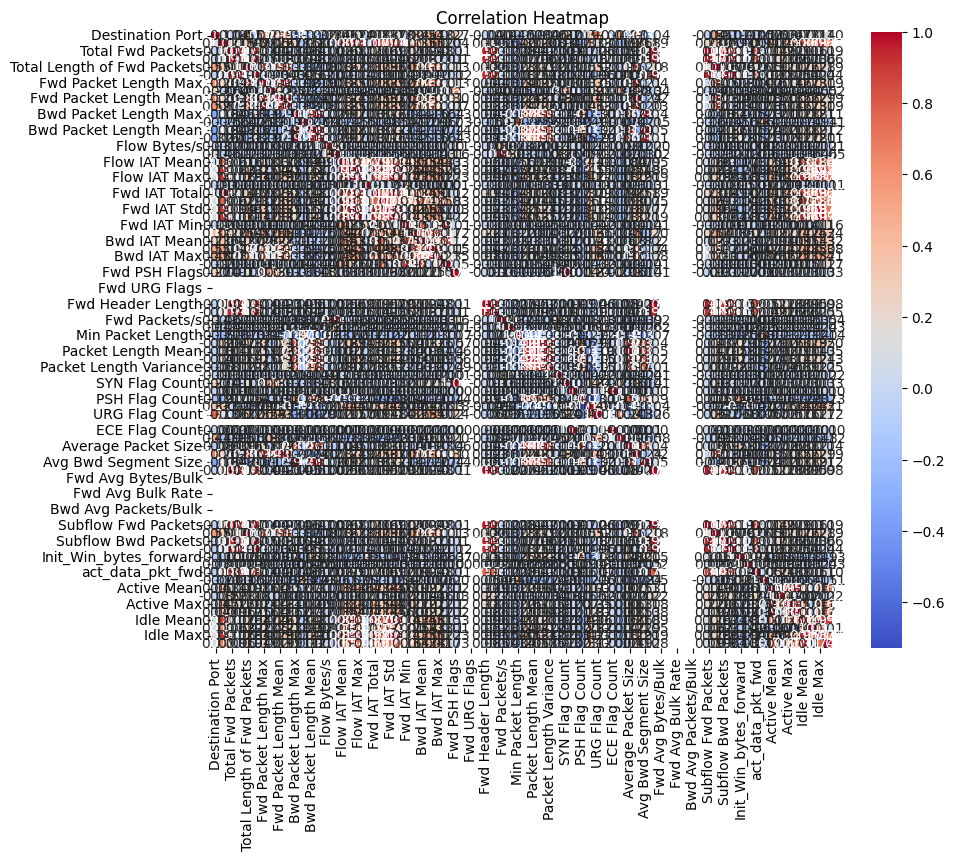

Histograms of numeric columns:


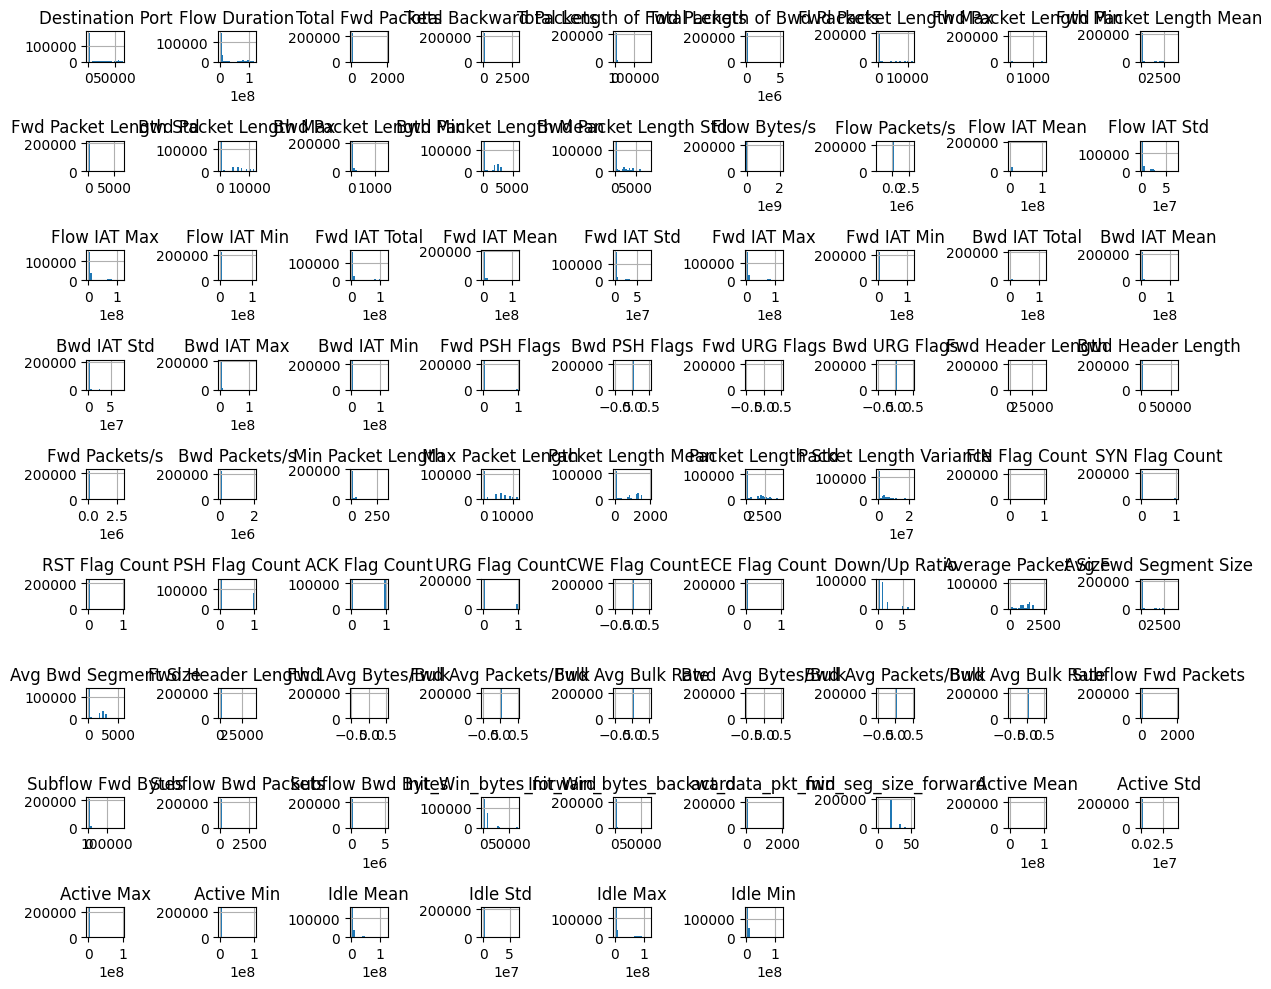

In [6]:
def explore_data(df):
    """
    Function to explore a dataset by showing basic information,
    summary statistics, missing values, and visualizations.

    Args:
    - df (pd.DataFrame): The DataFrame to explore.
    """
    # Basic Information
    print("Basic Information:")
    df.info()
    print("\n")

    # Show the first 5 rows
    print("First 5 rows of data:")
    print(df.head())
    print("\n")

    # Summary statistics for numeric columns
    print("Summary statistics for numeric columns:")
    print(df.describe())
    print("\n")

    # Missing Values
    print("Missing values per column:")
    print(df.isnull().sum())
    print("\n")

    # Check for duplicates
    print("Number of duplicate rows:", df.duplicated().sum())
    print("\n")

    # Data Types of Columns
    print("Data types of columns:")
    print(df.dtypes)
    print("\n")

    # Correlation heatmap for numeric columns
    print("Correlation heatmap of numeric columns:")
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Plot histograms for numeric columns
    print("Histograms of numeric columns:")
    # Select only numeric columns and replace infinite values with NaN
    numeric_df = df.select_dtypes(include=['number'])
    numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN

    # Drop rows with any NaN values in numeric columns before plotting
    numeric_df.dropna().hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()

# Call the explore_data function on your loaded DataFrame (df)
explore_data(df)


In [7]:
# Check for missing values
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [8]:
# Handle missing values by filling with the mean for numeric columns only
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-8-99742d817a57>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# One-hot encode categorical columns
print(df.columns)

df = pd.get_dummies(df, columns=['Label'])

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [11]:
# Split into training and testing datasets
# Assuming 'df' is your DataFrame and the one-hot encoded columns for 'Label' exist
# Get a list of columns starting with 'Label_' (assuming the prefix used by pd.get_dummies)
label_columns = [col for col in df.columns if col.startswith('Label_')]

# Features (all columns except the one-hot encoded 'Label' columns)
X = df.drop(columns=label_columns)

# Target variable (the one-hot encoded 'Label' columns)
y = df[label_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN in both training and testing data
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True) # This line was added

# Impute NaN values with the mean of each column for both training and testing data
for col in X_train.select_dtypes(include=np.number).columns:
    X_train[col].fillna(X_train[col].mean(), inplace=True)
    X_test[col].fillna(X_train[col].mean(), inplace=True)  #This line was added, and mean of training set is used

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

<ipython-input-11-8ab83d99f6f1>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mean(), inplace=True)
<ipython-input-11-8ab83d99f6f1>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Training data size: (178489, 78)
Testing data size: (44623, 78)


In [12]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


In [13]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18887
           1       1.00      1.00      1.00     25736

   micro avg       1.00      1.00      1.00     44623
   macro avg       1.00      1.00      1.00     44623
weighted avg       1.00      1.00      1.00     44623
 samples avg       1.00      1.00      1.00     44623



In [14]:
import joblib

# Save the model
joblib.dump(model, 'trained_model.pkl')

# Load the model later
loaded_model = joblib.load('trained_model.pkl')


In [15]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Assuming 'new_data' is a pandas DataFrame with new samples
new_data_scaled = scaler.transform(new_data)  # Apply the same scaler used earlier

# Make predictions
predictions = loaded_model.predict(new_data_scaled)

# Display predictions
print("Predictions:", predictions)
